## Author: Technocolabs Sofwares
## Credit: Mahmoud Yaser Salman
## Edited : Muhamed Mustafa Muhamed
## Programmed: Spotify Recommendation System Project 

<hr>

<center> <h1> Task 1: Feature Engineering</h1> </center>

<hr>

## Task Details 
- Deadline Date: 9/14/2022 <br>
- Deadline Time: 9:00 AM EG, 12:30 AM IST

- Dataset Link:
    - https://drive.google.com/file/d/1QB1suGX6SiyJpDZ9afpnfoRYJTwPyQMQ/view?usp=sharing

- You are required to add at minimum two modifications to the feature engineering of this dataset
    - Feel free to check your personal notebook regarding this task and add any modification which was not done in this example notebook
    - Feel free to contact your team leader if you want to ask about anything

- Recommendations
    - You may use `boxcox technique` to handle the skewness of the numerical data (but remember it only accepts positive data)
    - You may use `PCA` in different manner rather than dimensionality reduction
    - You may use different way than `correlation` to get the best features from the dataset
    - You may use `one hot encoding technique` regarding categorical features (yes, no) rather than (1, 0)
    - You may use one/many of the `object` columns and convert them into category `int` using `label encoding technique`

- Helping Materials
    - Feature Engineering Article
        - https://www.analyticsvidhya.com/blog/2021/03/step-by-step-process-of-feature-engineering-for-machine-learning-algorithms-in-data-science/
    - PCA Article
        - https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
    - Handle Skewed Data Article
        - https://medium.com/m/global-identity?redirectUrl=https%3A%2F%2Ftowardsdatascience.com%2Ftop-3-methods-for-handling-skewed-data-1334e0debf45

<center> <strong> Feel free to make any other recommendation which is not mentioned up here, that will imporve your data features </strong> </center> 

<center> Wish you best of luck </center>
<hr>

Down here is an example notebook which you have to modify your changes upon it.

<hr>

## Import Packages

In [124]:

import pandas as pd
# Import Pandas to use DataFrames
import swifter
# To efficiently apply any function to a Pandas Data Frame or Series object in the quickest available method
import numpy as np
# Import Numpy which will hel in mathematical calculations 
import matplotlib.pyplot as plt
import seaborn as sns
# To Visualize Data
import json
# To Read Json Files
import os
# To Access system files/options
import glob
# To return all file paths that match a specific pattern
from tqdm import tqdm
# To Display progress when using loops

#-----------------------------------------------------------------------

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
# To make feature extraction from spotify app

#-----------------------------------------------------------------------

import statsmodels
import sklearn
# To perform Statistical Analysis 
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA # Import the PCA class function from sklearn




pd.set_option('display.max_columns', None)
pd.set_option("display.precision", 2)
# Tune some options in pandas 


%matplotlib inline
# To make any plot appear in jupyter notebook


#by Muhamed Mustafa
from scipy import stats
import pandas_profiling

## Import our dataset

In [125]:
DATASETS_PATH = '.' # change to the path of your csv file
df_modified = pd.read_csv(os.path.join(DATASETS_PATH, 'feature_engineering_dataset.csv'))

In [126]:
df_modified

,pid,name,description,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,collaborative,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,time_signature,playlist_followers_artist,playlist_followers_album,playlist_followers_track
0,0,Throwbacks,NaN,1493424000,37,47,52,1,6,11532414,0,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
1,123,w o r k o u t,NaN,1500681600,171,225,245,1,26,55676545,0,73,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
2,218,party playlist,NaN,1504310400,74,93,98,1,4,21299385,0,14,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
3,342,Dance mix,NaN,1473724800,111,127,167,1,15,43330767,0,42,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
4,382,spin,NaN,1505347200,13,14,14,2,5,3617477,0,1,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266358,3999,other,NaN,1420848000,17,56,97,1,9,22548683,0,28,Jason Mraz,spotify:track:3ce7k1L4EkZppZPz1EJWTS,spotify:artist:4phGZZrJZRo4ElhRtViYdl,Living In The Moment,spotify:album:64SChsjQBiEe3aVTFYnW1b,235080,Love Is A Four Letter Word,0.65,0.63,7,-7.16,1,0.02,4.83e-02,0.00e+00,0.12,0.70,84.14,3ce7k1L4EkZppZPz1EJWTS,spotify:track:3ce7k1L4EkZppZPz1EJWTS,https://api.spotify.com/v1/tracks/3ce7k1L4EkZp...,https://api.spotify.com/v1/audio-analysis/3ce7...,4,248,79,1
266359,3999,other,NaN,1420848000,17,56,97,1,9,22548683,0,36,The Cure,spotify:track:6DW7MN6DCVvTDjtcL5IM9a,spotify:artist:7bu3H8JO7d0UbMoVzbo70s,Pictures Of You - Remix,spotify:album:3jRLyc2t1tExfVpdB88EUm,288106,Galore - The Singles 1987-1997,0.46,0.74,9,-6.10,1,0.03,4.48e-03,1.02e-02,0.12,0.63,172.72,6DW7MN6DCVvTDjtcL5IM9a,spotify:track:6DW7MN6DCVvTDjtcL5IM9a,https://api.spotify.com/v1/tracks/6DW7MN6DCVvT...,https://api.spotify.com/v1/audio-analysis/6DW7...,4,79,1,1
266360,3999,other,NaN,1420848000,17,56,97,1,9,22548683,0,37,The Cure

In [127]:
eda = pandas_profiling.ProfileReport(df_modified)
#eda

## Get all numerical columns

In [128]:
numerical_features = (df_modified.dtypes == 'int64') | (df_modified.dtypes == 'float64')
numerical_columns = []
for i in range(len(numerical_features)):
    if numerical_features[i]:
        numerical_columns.append(df_modified.columns[i])
numerical_columns

['pid',
 'modified_at',
 'num_artists',
 'num_albums',
 'num_tracks',
 'num_followers',
 'num_edits',
 'playlist_duration_ms',
 'collaborative',
 'pos',
 'duration_ms',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature',
 'playlist_followers_artist',
 'playlist_followers_album',
 'playlist_followers_track']

## Handling Missing Values

In [129]:
df_modified['instrumentalness'].replace(0, df_modified['instrumentalness'].mean(), inplace=True)


## Transfrom Data to Handle Skewness

**We can can deal with these problems as following:**
- for skewness  (to try to give them a normal distribution):
   - we can apply `log` transformation for right-skewed columns.
   - we can apply `power` transformation for left-skewed columns.
   
- for outliers:
   - use Tukey’s box plot method to detect and winsorize outliers.
   - or, use imputation

### Apply Log Transformation For Right-Skewed Features and Power Transformation For Left-Skewed Features

- Apply exponential trasformation for `modified_at`, `energy`, `loudness`, and `time_signature`.
- Apply log transformation for `num_artists`, `num_albums`, `num_tracks`, `num_followers`, `num_edits`, `playlist_duration_ms`, `duration_ms`, `key`, `speechiness`, `acousticness`, `instrumentalness`, and `liveness`.
-And the rest numeric features has almost a normal distribution or there is no need to trasfrom them like in the `pos` column

To see why would we apply log transformation on certain features and exponential transformation on another features, Lets see the positive skewed features and the negative ones.

In [130]:
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266363 entries, 0 to 266362
Data columns (total 38 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   pid                        266363 non-null  int64  
 1   name                       266363 non-null  object 
 2   description                5333 non-null    object 
 3   modified_at                266363 non-null  int64  
 4   num_artists                266363 non-null  int64  
 5   num_albums                 266363 non-null  int64  
 6   num_tracks                 266363 non-null  int64  
 7   num_followers              266363 non-null  int64  
 8   num_edits                  266363 non-null  int64  
 9   playlist_duration_ms       266363 non-null  int64  
 10  collaborative              266363 non-null  int64  
 11  pos                        266363 non-null  int64  
 12  artist_name                266363 non-null  object 
 13  track_uri                  26

In [131]:
positive_skewed = []
negative_skewed = []
for i in range(len(df_modified[numerical_columns].columns)):
    if (df_modified[numerical_columns].skew()[i]>0):
        positive_skewed.append(df_modified[numerical_columns].skew().index[i])
    else:
        negative_skewed.append(df_modified[numerical_columns].skew().index[i])

In [132]:
len(positive_skewed)

20

In [133]:
len(negative_skewed)

6

In [134]:
len(numerical_columns)

26

In [135]:
numerical_columns

['pid',
 'modified_at',
 'num_artists',
 'num_albums',
 'num_tracks',
 'num_followers',
 'num_edits',
 'playlist_duration_ms',
 'collaborative',
 'pos',
 'duration_ms',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature',
 'playlist_followers_artist',
 'playlist_followers_album',
 'playlist_followers_track']

So, We analyzed all the columns into positive and negative skewed.

- We can find that these columns are those that was instructed to make logarithmic transform on them<br>
- The instructed columns were `[modified_at, energy, loudness, time_signature]`<br>
- We find that `[danceability, mode]` columns are missing. So, lets check the reason 

In [136]:
def drawHist(df, column):
    fig, ax = plt.subplots()
    df[column].hist()
    ax.set_title(f"Skew Factor: {df[column].skew()}")
    ax.set_xlabel(f"{df[column].name}")
    return 0

0

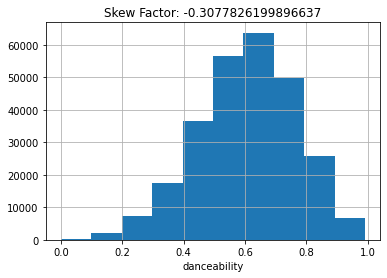

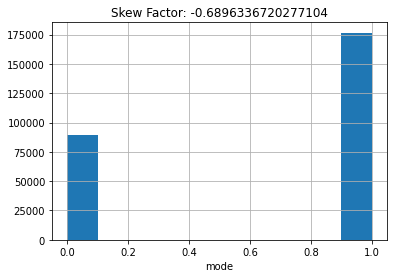

In [137]:
drawHist(df_modified, "danceability")
drawHist(df_modified, "mode")

- The reason is `danceability` column is nearly normally distributed
- `mode` column is a categorical one

In [138]:
negative_skewed = ["modified_at", "energy", "loudness", "time_signature"]

def tarnsform_columns(df, column, p):
    df1 = df.copy()
    if p == 'n':
        for i in range(len(df1[column].columns)):
            df1[df1[column].columns[i]] = np.exp(df1[df1[column].columns[i]])
    else:
            for i in range(len(df1[column].columns)):
                df1[df1[column].columns[i]] = np.sqrt(((df1[df1[column].columns[i]])+1))
    return df1

0

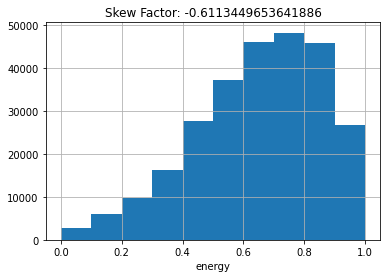

In [139]:
drawHist(df_modified, negative_skewed[1])

In [140]:
df_transformed = df_modified.copy()
df_transformed = tarnsform_columns(df_modified, negative_skewed, 'n')
df_transformed.head()

c:\Users\mido9\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


,pid,name,description,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,collaborative,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,time_signature,playlist_followers_artist,playlist_followers_album,playlist_followers_track
0,0,Throwbacks,NaN,inf,37,47,52,1,6,11532414,0,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,2.25,4,8.21e-04,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,54.6,126,22,21
1,123,w o r k o u t,NaN,inf,171,225,245,1,26,55676545,0,73,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,2.25,4,8.21e-04,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,54.6,126,22,21
2,218,party playlist,NaN,inf,74,93,98,1,4,21299385,0,14,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,2.25,4,8.21e-04,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,54.6,126,22,21
3,342,Dance mix,NaN,inf,111,127,167,1,15,43330767,0,42,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,2.25,4,8.21e-04,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,54.6,126,22,21
4,382,spin,NaN,inf,13,14,14,2,5,3617477,0,1,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,2.25,4,8.21e-04,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,54.6,126,22,21


0

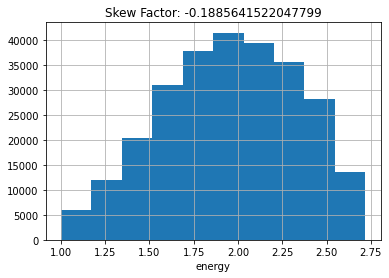

In [141]:
drawHist(df_transformed, negative_skewed[1])

0

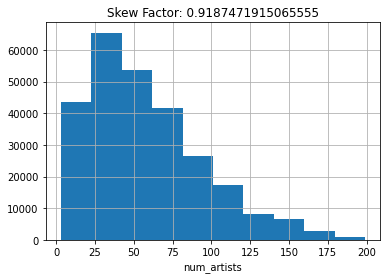

In [142]:
drawHist(df_transformed, positive_skewed[1])

In [143]:
df_transformed = df_modified.copy()
df_transformed = tarnsform_columns(df_modified, positive_skewed, 'p')
df_transformed.head()

,pid,name,description,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,collaborative,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,time_signature,playlist_followers_artist,playlist_followers_album,playlist_followers_track
0,1.00,Throwbacks,NaN,1493424000,6.16,6.93,7.28,1.41,2.65,3395.94,1.0,1.00,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,476.3,The Cookbook,0.9,0.81,2.24,-7.11,0,1.06,1.02,1.0,1.02,1.35,11.25,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,11.27,4.8,4.69
1,11.14,w o r k o u t,NaN,1500681600,13.11,15.03,15.68,1.41,5.20,7461.67,1.0,8.60,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,476.3,The Cookbook,0.9,0.81,2.24,-7.11,0,1.06,1.02,1.0,1.02,1.35,11.25,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,11.27,4.8,4.69
2,14.80,party playlist,NaN,1504310400,8.66,9.70,9.95,1.41,2.24,4615.13,1.0,3.87,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,476.3,The Cookbook,0.9,0.81,2.24,-7.11,0,1.06,1.02,1.0,1.02,1.35,11.25,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,11.27,4.8,4.69
3,18.52,Dance mix,NaN,1473724800,10.58,11.31,12.96,1.41,4.00,6582.61,1.0,6.56,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,476.3,The Cookbook,0.9,0.81,2.24,-7.11,0,1.06,1.02,1.0,1.02,1.35,11.25,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,11.27,4.8,4.69
4,19.57,spin,NaN,1505347200,3.74,3.87,3.87,1.73,2.45,1901.97,1.0,1.41,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,476.3,The Cookbook,0.9,0.81,2.24,-7.11,0,1.06,1.02,1.0,1.02,1.35,11.25,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,11.27,4.8,4.69


0

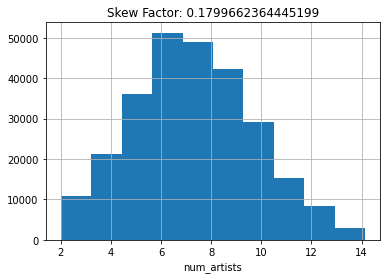

In [144]:
drawHist(df_transformed, positive_skewed[1])

Before Transform Distribution

C:\Users\mido9\AppData\Local\Temp\ipykernel_36700\238782014.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_modified[numerical_columns].hist(ax = ax, bins=20)


array([[<AxesSubplot:title={'center':'pid'}>,
        <AxesSubplot:title={'center':'modified_at'}>,
        <AxesSubplot:title={'center':'num_artists'}>,
        <AxesSubplot:title={'center':'num_albums'}>,
        <AxesSubplot:title={'center':'num_tracks'}>],
       [<AxesSubplot:title={'center':'num_followers'}>,
        <AxesSubplot:title={'center':'num_edits'}>,
        <AxesSubplot:title={'center':'playlist_duration_ms'}>,
        <AxesSubplot:title={'center':'collaborative'}>,
        <AxesSubplot:title={'center':'pos'}>],
       [<AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalnes

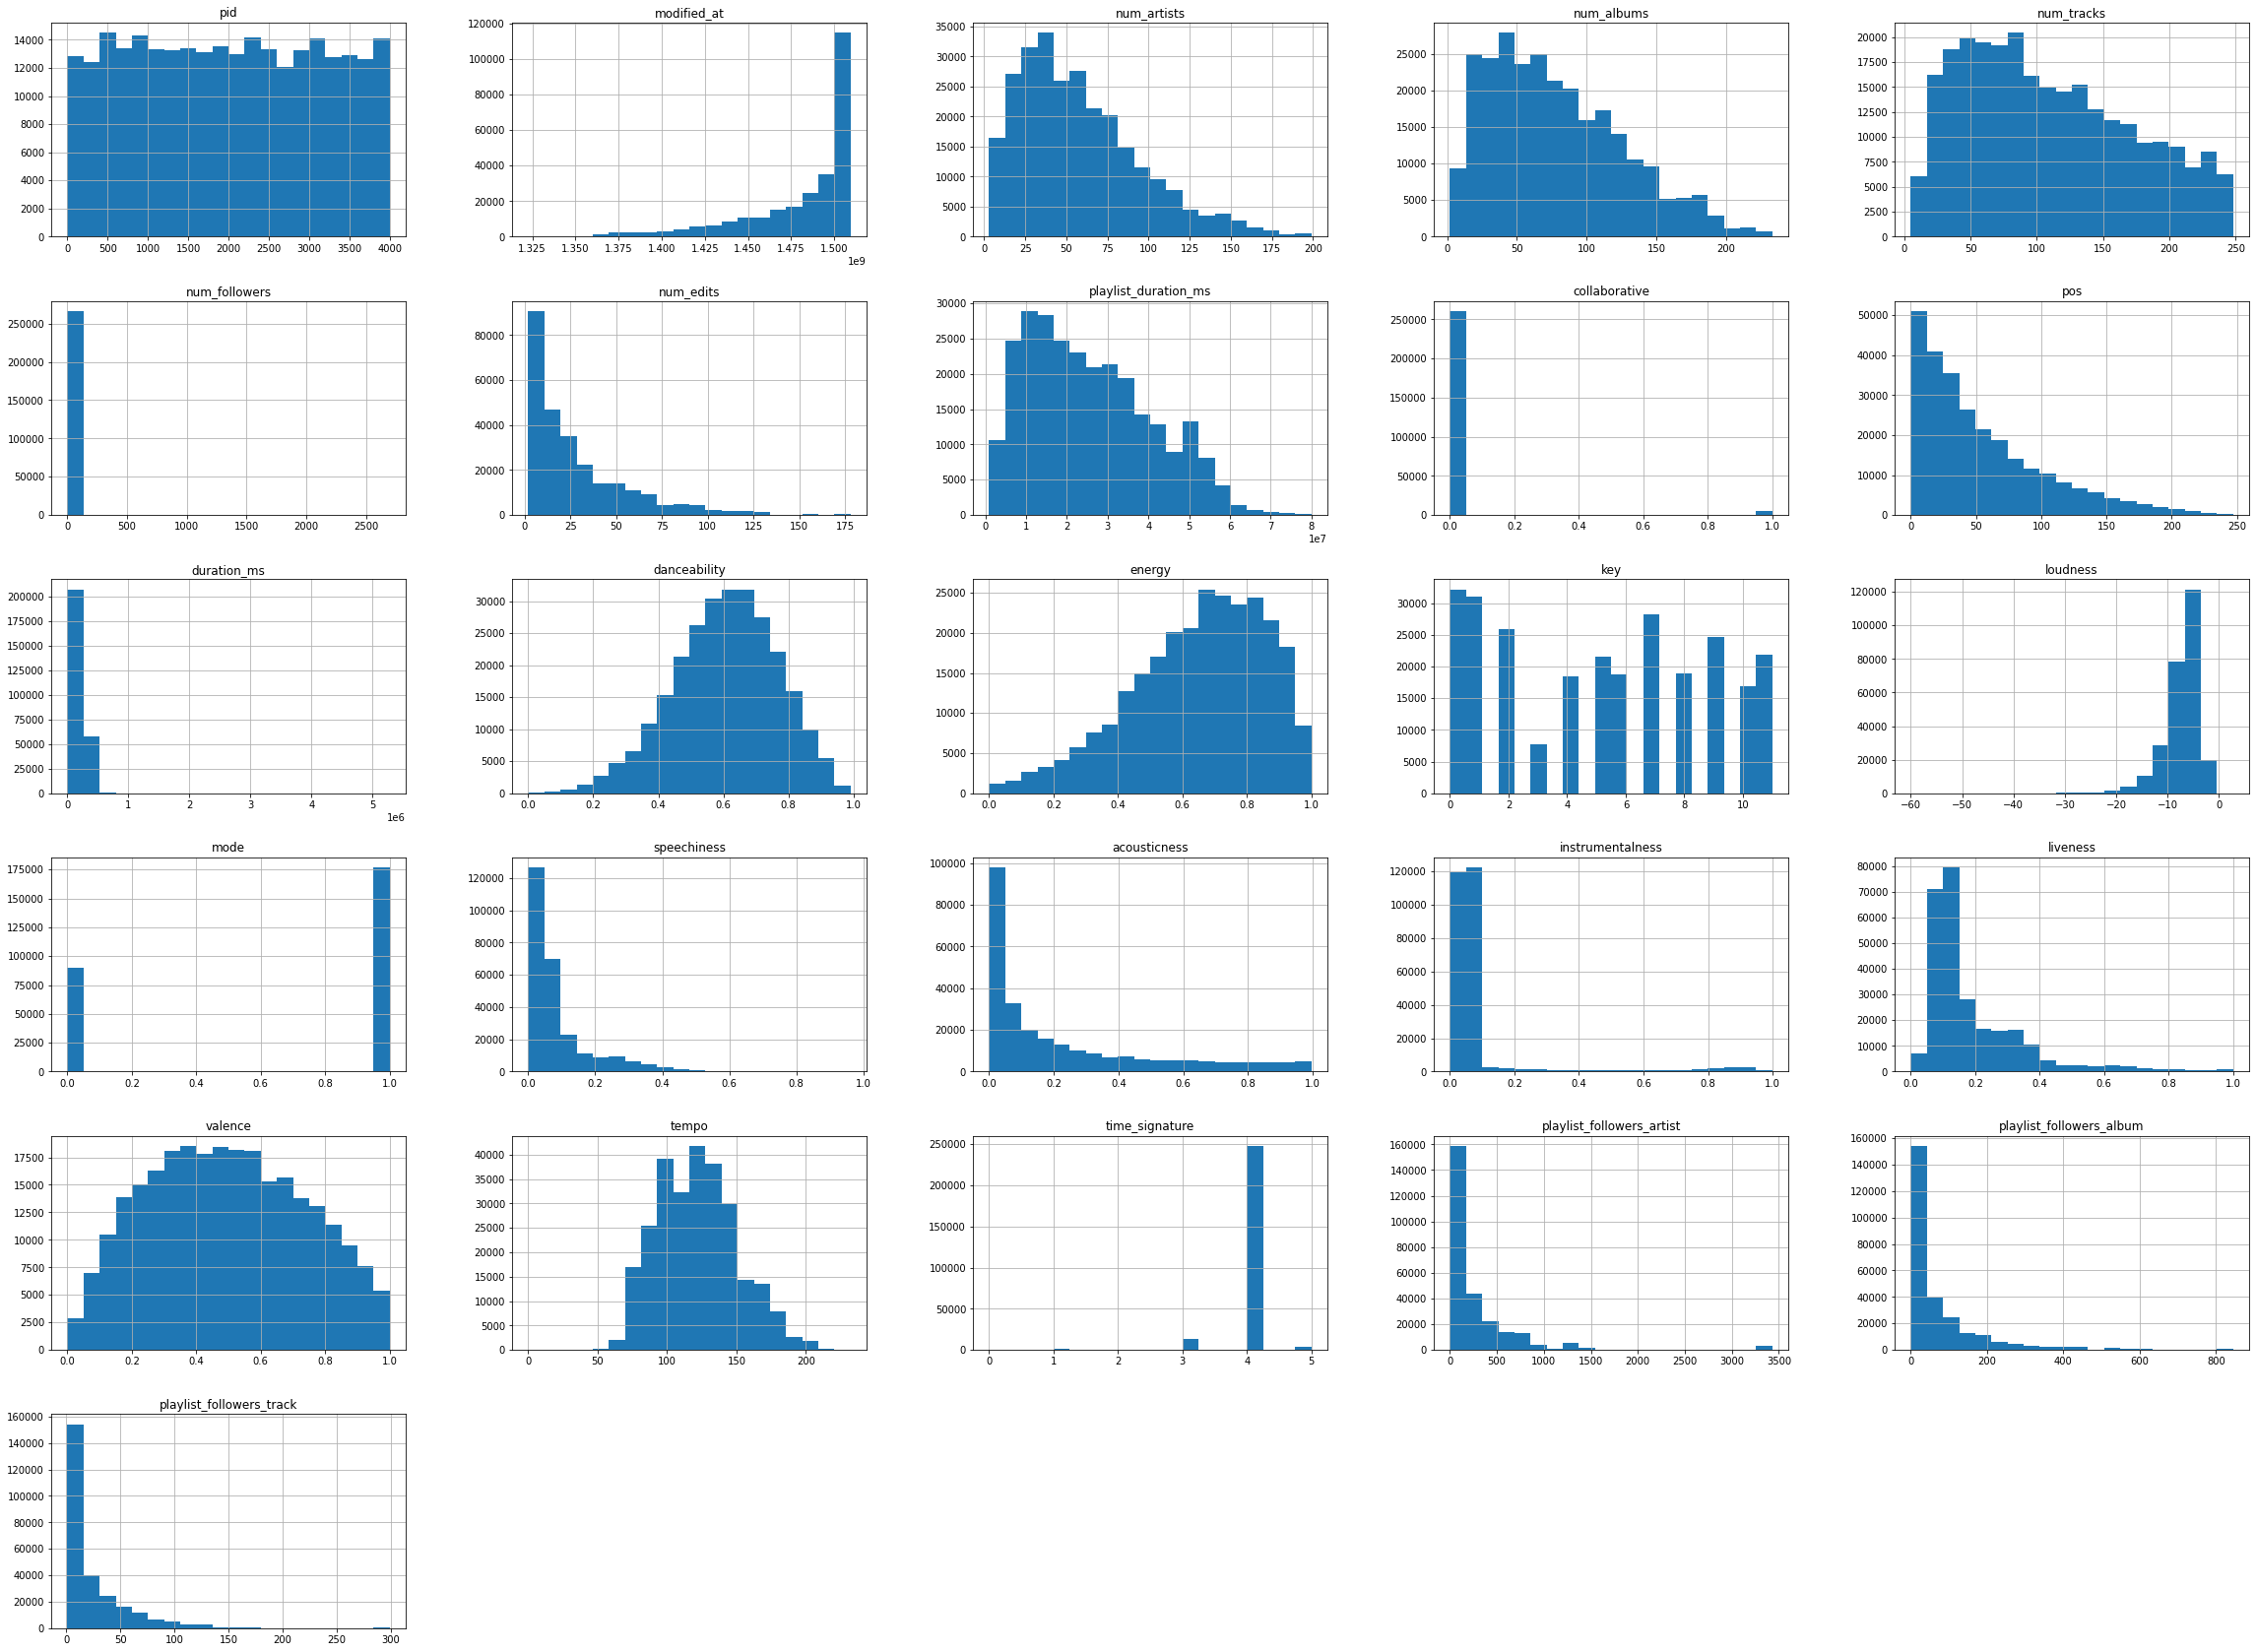

In [145]:
fig = plt.figure(figsize = (40,30))
ax = fig.gca()
df_modified[numerical_columns].hist(ax = ax, bins=20)

After Transform Distribution

C:\Users\mido9\AppData\Local\Temp\ipykernel_36700\803111950.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_transformed[numerical_columns].hist(ax = ax, bins=20)


array([[<AxesSubplot:title={'center':'pid'}>,
        <AxesSubplot:title={'center':'modified_at'}>,
        <AxesSubplot:title={'center':'num_artists'}>,
        <AxesSubplot:title={'center':'num_albums'}>,
        <AxesSubplot:title={'center':'num_tracks'}>],
       [<AxesSubplot:title={'center':'num_followers'}>,
        <AxesSubplot:title={'center':'num_edits'}>,
        <AxesSubplot:title={'center':'playlist_duration_ms'}>,
        <AxesSubplot:title={'center':'collaborative'}>,
        <AxesSubplot:title={'center':'pos'}>],
       [<AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalnes

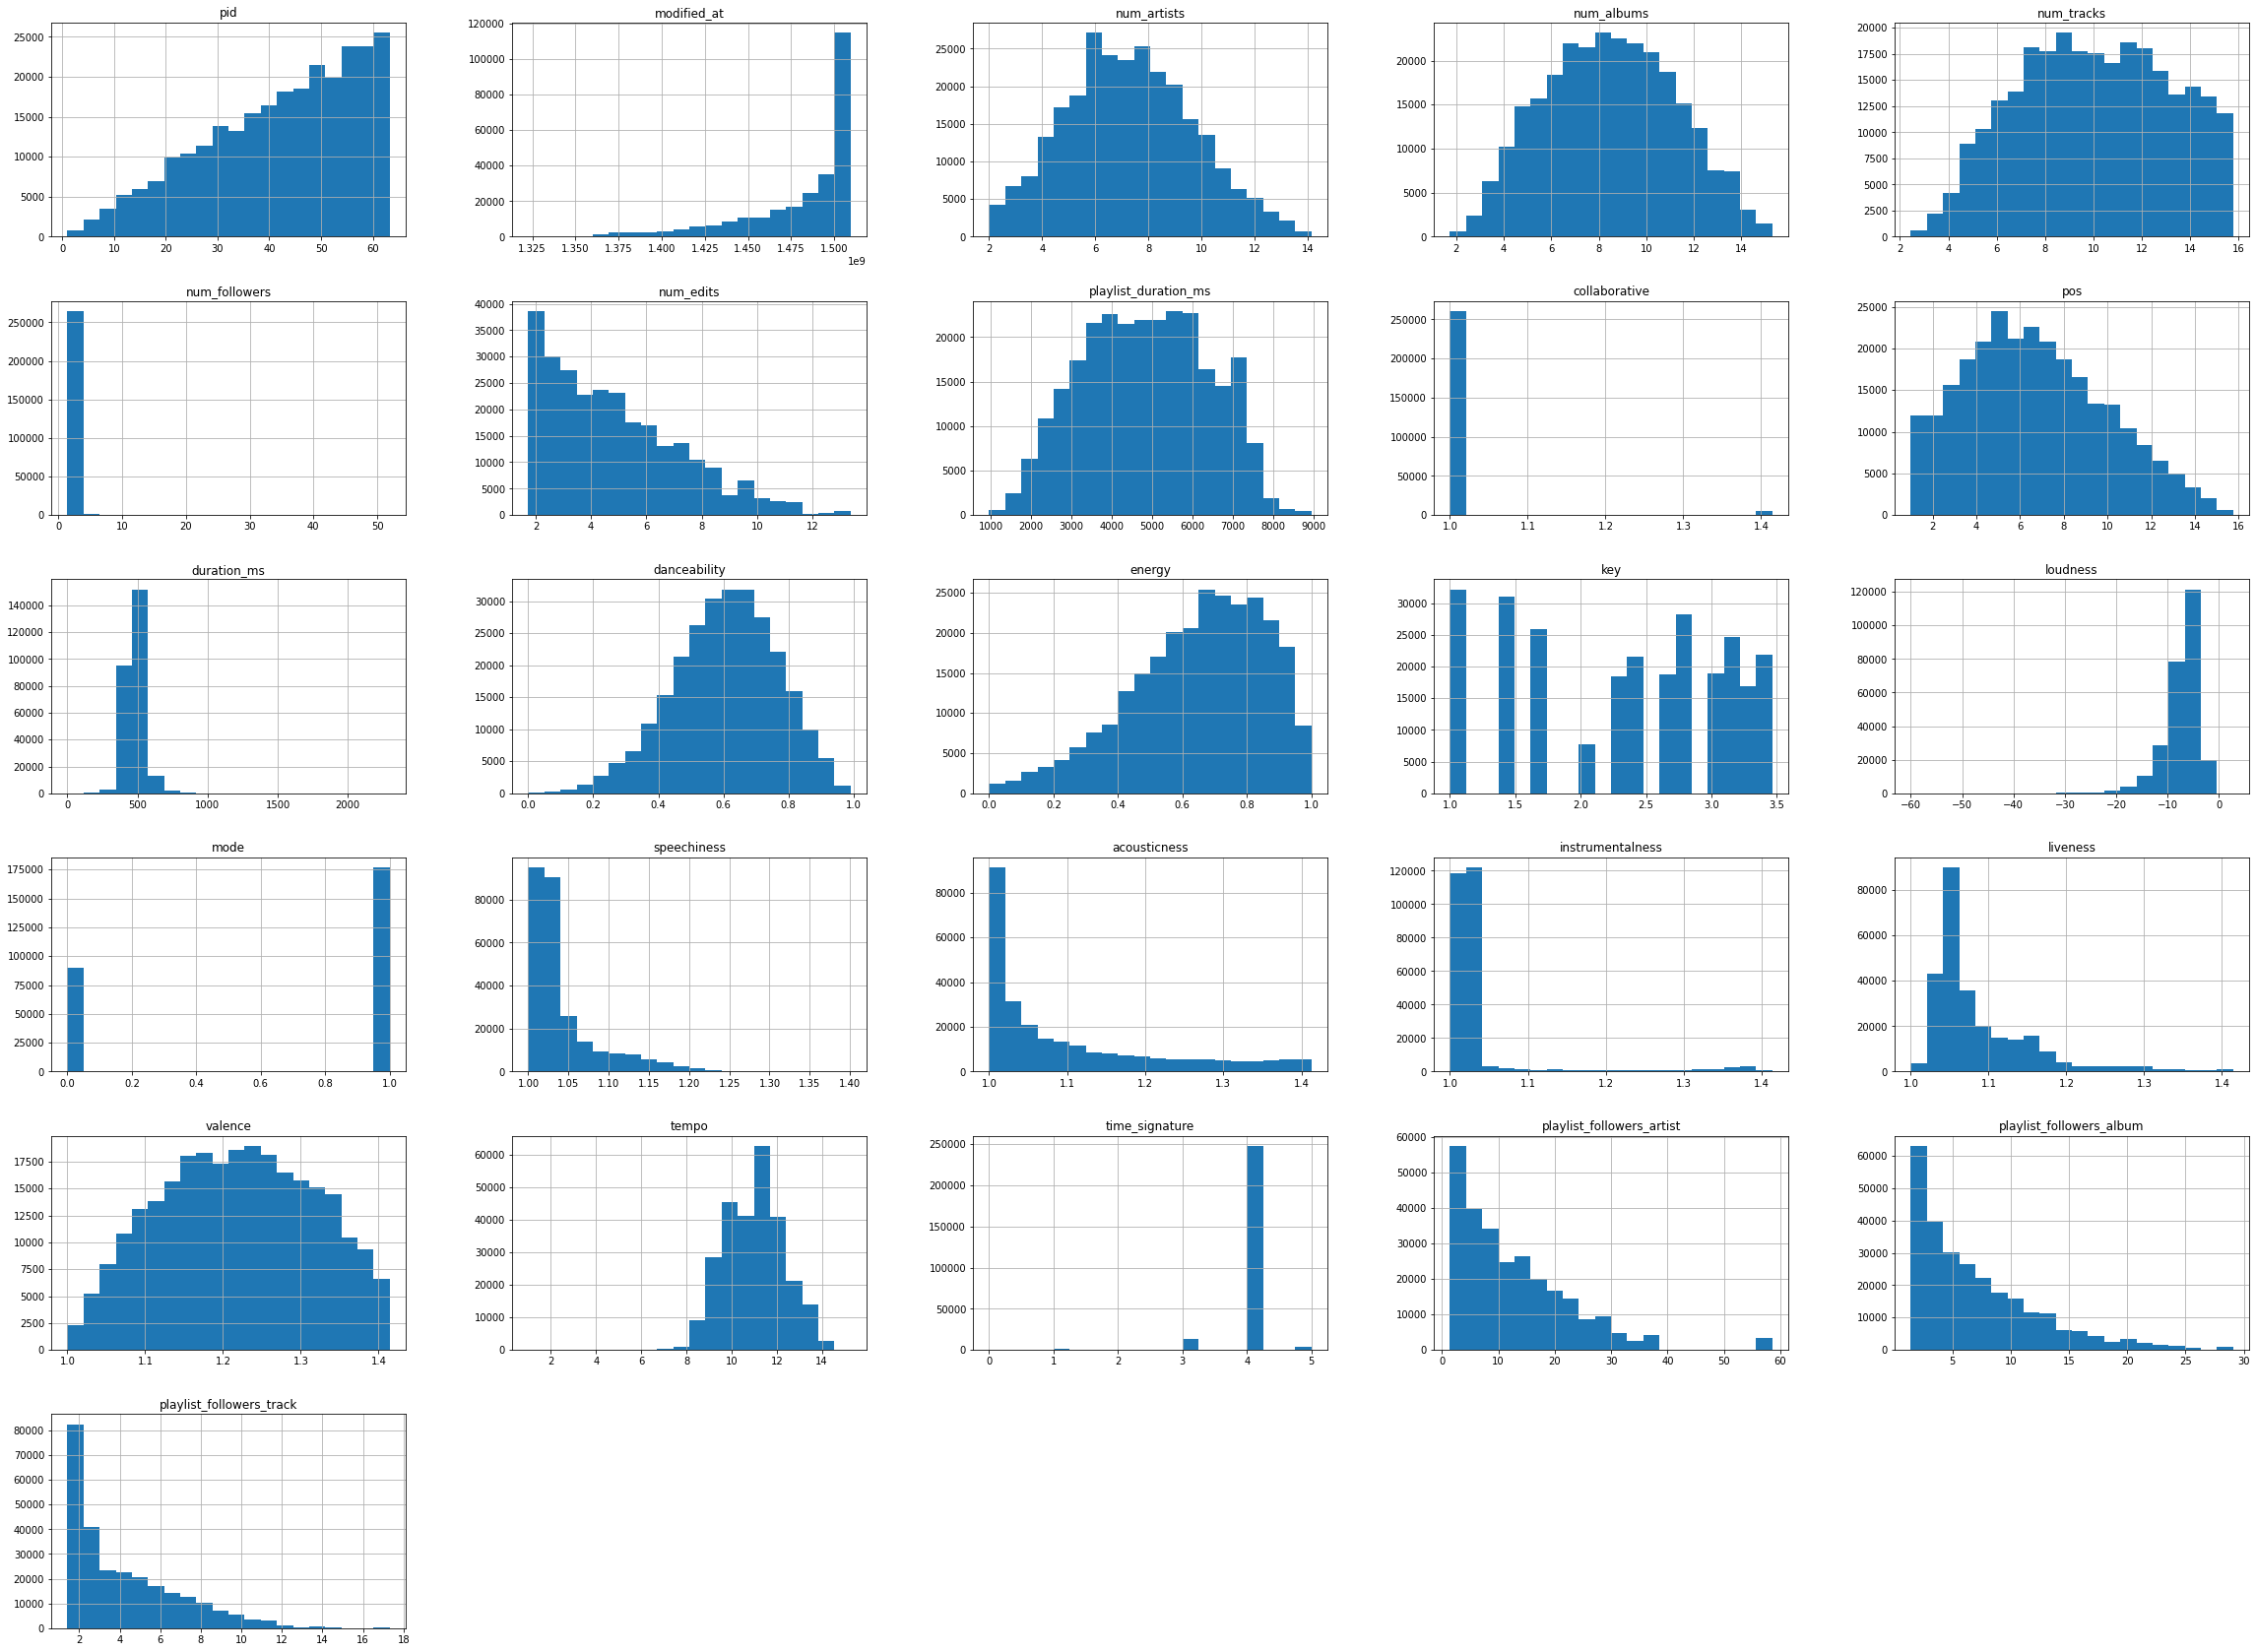

In [146]:
fig = plt.figure(figsize = (40,30))
ax = fig.gca()
df_transformed[numerical_columns].hist(ax = ax, bins=20)

## Apply Tukey’s box plot method to detect and winsorize outliers

Next to its visual benefits, the box plot provides useful statistics to identify individual observations as outliers. Tukey distinguishes between possible and probable outliers. A possible outlier is located between the inner and the outer fence, whereas a probable outlier is located outside the outer fence.

While the inner (often confused with the whiskers) and outer fence are usually not shown on the actual box plot, they can be calculated using the interquartile range (IQR) like this:

**IQR =Q3 - Q1, whereas q3 := 75th quartile and q1 := 25th quartile**

**Inner fence = [Q1-1.5*IQR, Q3+1.5*IQR]**

**Outer fence = [Q1–3*IQR, Q3+3*IQR]**

**The distribution’s inner fence is defined as 1.5 x IQR below Q1, and 1.5 x IQR above Q3. The outer fence is defined as 3 x IQR below Q1, and 3 x IQR above Q3**


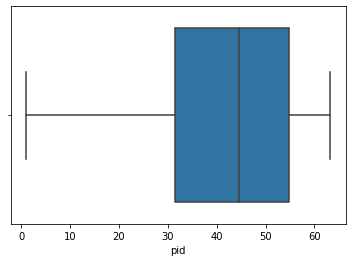

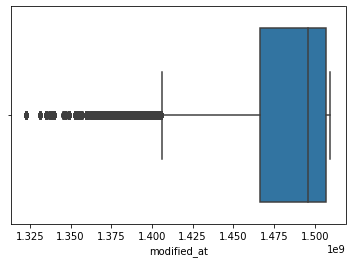

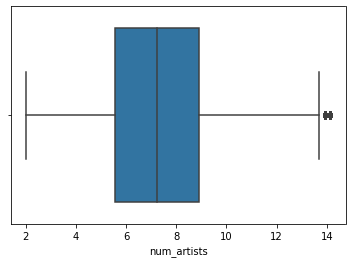

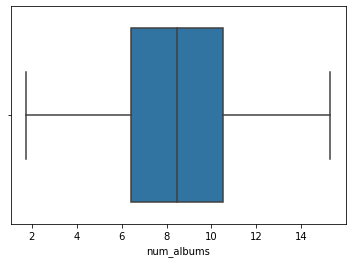

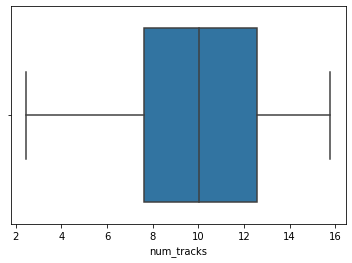

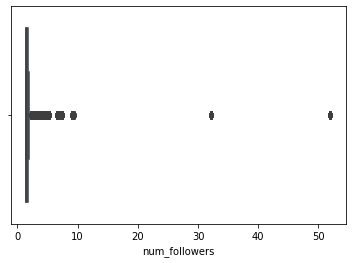

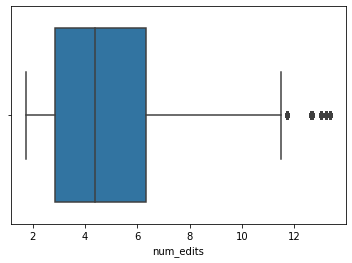

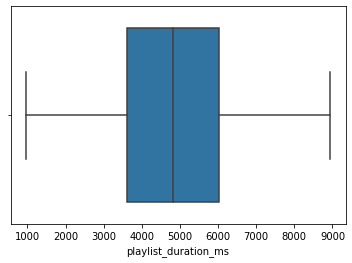

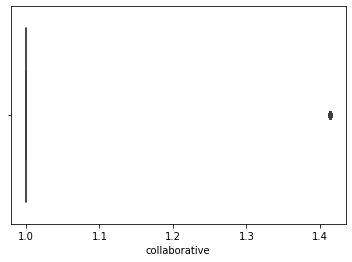

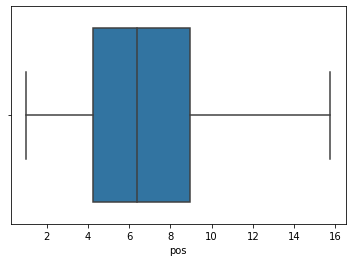

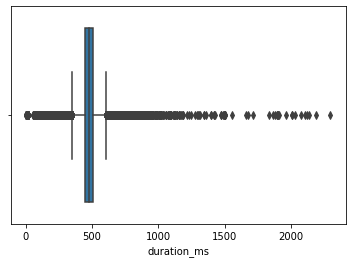

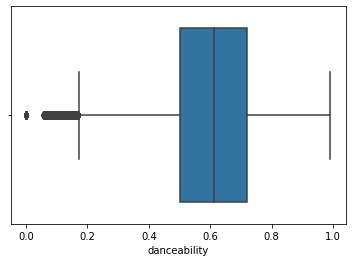

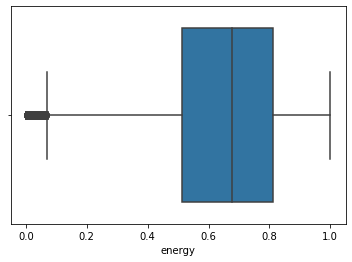

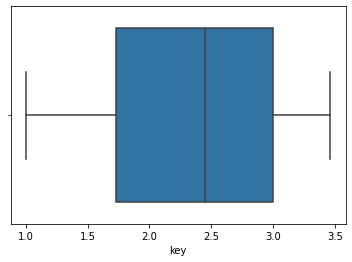

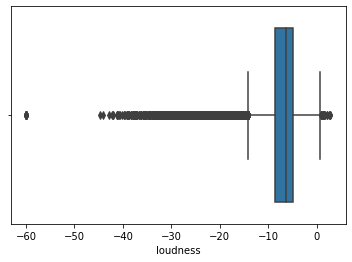

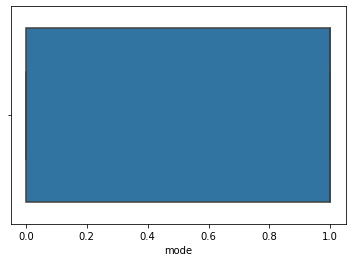

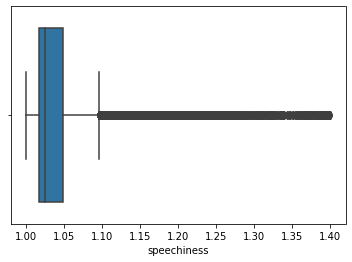

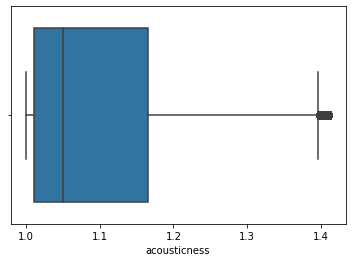

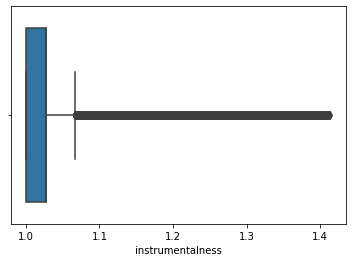

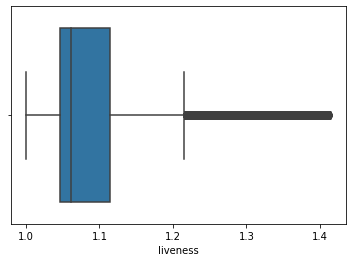

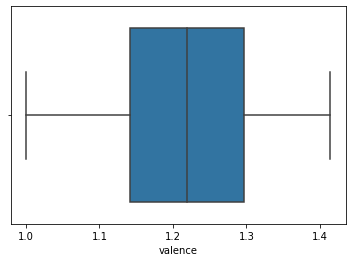

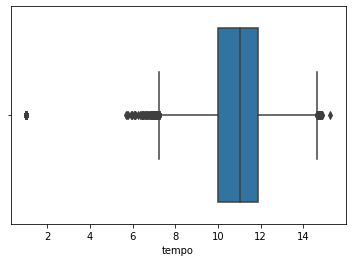

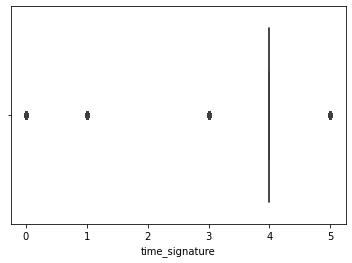

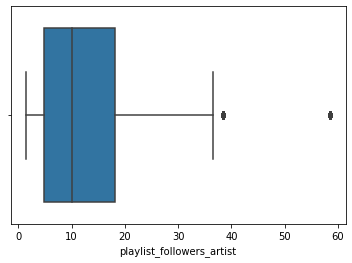

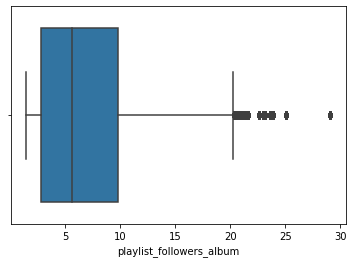

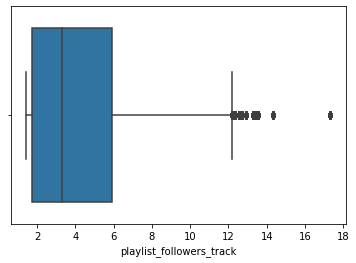

In [147]:
for col in numerical_columns:
    sns.boxplot(df_transformed[col])
    plt.show()

In [148]:
for col in numerical_columns:
        Q1=df_transformed[col].quantile(0.25)
        Q3=df_transformed[col].quantile(0.75)
        IQR=Q3-Q1
        lower=Q1-1.5*IQR
        upper=Q3+1.5*IQR
        print(df_transformed[col][(df_transformed[col])<lower])
        df_transformed[col][(df_transformed[col]<lower)]=lower
        print(df_transformed[col][(df_transformed[col])<lower])
        df_transformed[col][(df_transformed[col]>upper)]=upper


Series([], Name: pid, dtype: float64)
Series([], Name: pid, dtype: float64)
32        1393200000
35        1402876800
107       1389398400
116       1331251200
117       1387152000
             ...    
266234    1365033600
266235    1365033600
266236    1365033600
266237    1365033600
266238    1365033600
Name: modified_at, Length: 12881, dtype: int64
Series([], Name: modified_at, dtype: int64)
Series([], Name: num_artists, dtype: float64)
Series([], Name: num_artists, dtype: float64)
Series([], Name: num_albums, dtype: float64)
Series([], Name: num_albums, dtype: float64)
Series([], Name: num_tracks, dtype: float64)
Series([], Name: num_tracks, dtype: float64)


C:\Users\mido9\AppData\Local\Temp\ipykernel_36700\1925105042.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transformed[col][(df_transformed[col]<lower)]=lower
C:\Users\mido9\AppData\Local\Temp\ipykernel_36700\1925105042.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transformed[col][(df_transformed[col]>upper)]=upper
C:\Users\mido9\AppData\Local\Temp\ipykernel_36700\1925105042.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

Series([], Name: num_followers, dtype: float64)
Series([], Name: num_followers, dtype: float64)
Series([], Name: num_edits, dtype: float64)
Series([], Name: num_edits, dtype: float64)
Series([], Name: playlist_duration_ms, dtype: float64)
Series([], Name: playlist_duration_ms, dtype: float64)
Series([], Name: collaborative, dtype: float64)
Series([], Name: collaborative, dtype: float64)
Series([], Name: pos, dtype: float64)
Series([], Name: pos, dtype: float64)
1779      265.13
1780      255.55
1781      329.44
1783      331.99
1786      323.42
           ...  
266197    255.34
266200    286.05
266231    305.31
266261    300.16
266300    340.63
Name: duration_ms, Length: 4100, dtype: float64


C:\Users\mido9\AppData\Local\Temp\ipykernel_36700\1925105042.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transformed[col][(df_transformed[col]<lower)]=lower
C:\Users\mido9\AppData\Local\Temp\ipykernel_36700\1925105042.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transformed[col][(df_transformed[col]>upper)]=upper
C:\Users\mido9\AppData\Local\Temp\ipykernel_36700\1925105042.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

Series([], Name: duration_ms, dtype: float64)
1782      0.08
2837      0.15
2844      0.17
3826      0.17
3827      0.17
          ... 
266265    0.12
266268    0.12
266271    0.13
266272    0.16
266274    0.12
Name: danceability, Length: 1445, dtype: float64
Series([], Name: danceability, dtype: float64)
2718      6.82e-02
2856      1.34e-02
22733     5.69e-03
25696     5.49e-02
25697     5.49e-02
            ...   
266269    4.34e-02
266270    1.24e-02
266271    6.98e-03
266272    3.73e-03
266274    3.27e-02
Name: energy, Length: 1821, dtype: float64
Series([], Name: energy, dtype: float64)
Series([], Name: key, dtype: float64)
Series([], Name: key, dtype: float64)
1723     -14.52
1724     -14.52
1725     -14.52
1726     -14.52
1727     -14.52
          ...  
266279   -15.18
266282   -16.91
266295   -16.07
266327   -18.54
266353   -15.56
Name: loudness, Length: 11892, dtype: float64
Series([], Name: loudness, dtype: float64)
Series([], Name: mode, dtype: int64)
Series([], Name: mode,

C:\Users\mido9\AppData\Local\Temp\ipykernel_36700\1925105042.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transformed[col][(df_transformed[col]<lower)]=lower
C:\Users\mido9\AppData\Local\Temp\ipykernel_36700\1925105042.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transformed[col][(df_transformed[col]>upper)]=upper
C:\Users\mido9\AppData\Local\Temp\ipykernel_36700\1925105042.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

In [149]:
def remove_outliers(df, numericalColumns):
    df1 = df.copy()
    for col in numericalColumns:
        Q1=df1[col].quantile(0.25)
        Q3=df1[col].quantile(0.75)
        IQR=Q3-Q1
        lower=Q1-1.5*IQR
        upper=Q3+1.5*IQR
        df1[col][(df1[col]<lower)]=lower
        df1[col][(df1[col]>upper)]=upper
    return df1

In [150]:
df_cleaned = remove_outliers(df_transformed, numerical_columns)
df_cleaned

C:\Users\mido9\AppData\Local\Temp\ipykernel_36700\1796915527.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col][(df1[col]<lower)]=lower
C:\Users\mido9\AppData\Local\Temp\ipykernel_36700\1796915527.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col][(df1[col]>upper)]=upper


,pid,name,description,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,collaborative,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,time_signature,playlist_followers_artist,playlist_followers_album,playlist_followers_track
0,1.00,Throwbacks,NaN,1493424000,6.16,6.93,7.28,1.41,2.65,3395.94,1.0,1.00,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,476.30,The Cookbook,0.90,0.81,2.24,-7.11,0,1.06,1.02,1.00,1.02,1.35,11.25,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,11.27,4.80,4.69
1,11.14,w o r k o u t,NaN,1500681600,13.11,15.03,15.68,1.41,5.20,7461.67,1.0,8.60,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,476.30,The Cookbook,0.90,0.81,2.24,-7.11,0,1.06,1.02,1.00,1.02,1.35,11.25,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,11.27,4.80,4.69
2,14.80,party playlist,NaN,1504310400,8.66,9.70,9.95,1.41,2.24,4615.13,1.0,3.87,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,476.30,The Cookbook,0.90,0.81,2.24,-7.11,0,1.06,1.02,1.00,1.02,1.35,11.25,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,11.27,4.80,4.69
3,18.52,Dance mix,NaN,1473724800,10.58,11.31,12.96,1.41,4.00,6582.61,1.0,6.56,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,476.30,The Cookbook,0.90,0.81,2.24,-7.11,0,1.06,1.02,1.00,1.02,1.35,11.25,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,11.27,4.80,4.69
4,19.57,spin,NaN,1505347200,3.74,3.87,3.87,1.73,2.45,1901.97,1.0,1.41,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,476.30,The Cookbook,0.90,0.81,2.24,-7.11,0,1.06,1.02,1.00,1.02,1.35,11.25,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,11.27,4.80,4.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266358,63.25,other,NaN,1420848000,4.24,7.55,9.90,1.41,3.16,4748.55,1.0,5.39,Jason Mraz,spotify:track:3ce7k1L4EkZppZPz1EJWTS,spotify:artist:4phGZZrJZRo4ElhRtViYdl,Living In The Moment,spotify:album:64SChsjQBiEe3aVTFYnW1b,484.85,Love Is A Four Letter Word,0.65,0.63,2.83,-7.16,1,1.01,1.02,1.03,1.06,1.30,9.23,3ce7k1L4EkZppZPz1EJWTS,spotify:track:3ce7k1L4EkZppZPz1EJWTS,https://api.spotify.com/v1/tracks/3ce7k1L4EkZp...,https://api.spotify.com/v1/audio-analysis/3ce7...,4,15.78,8.94,1.41
266359,63.25,other,NaN,1420848000,4.24,7.55,9.90,1.41,3.16,4748.55,1.0,6.08,The Cure,spotify:track:6DW7MN6DCVvTDjtcL5IM9a,spotify:artist:7bu3H8JO7d0UbMoVzbo70s,Pictures Of You - Remix,spotify:album:3jRLyc2t1tExfVpdB88EUm,536.76,Galore - The Singles 1987-1997,0.46,0.74,3.16,-6.10,1,1.02,1.00,1.01,1.06,1.28,13.18,6DW7MN6DCVvTDjtcL5IM9a,spotify:track:6DW7MN6DCVvTDjtcL5IM9a,https://api.spotify.com/v1/tracks/6DW7MN6DCVvT...,https://api.s

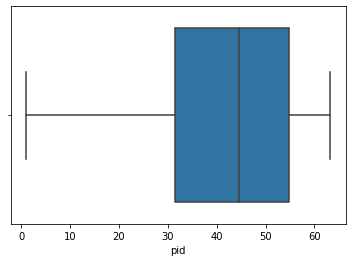

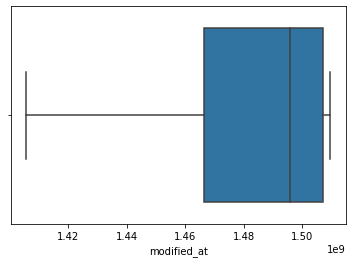

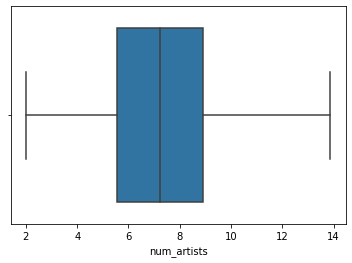

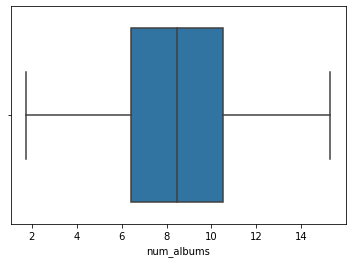

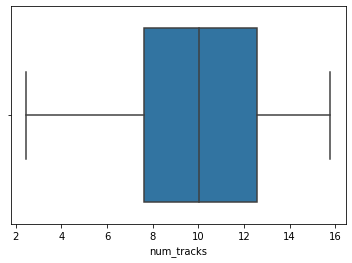

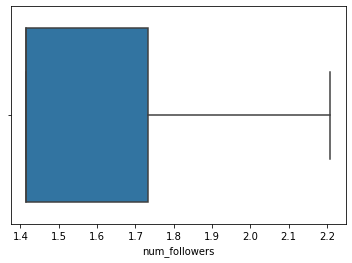

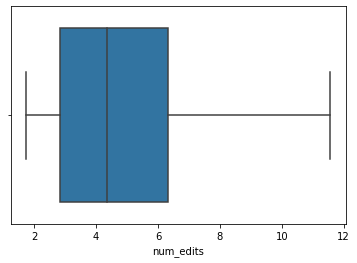

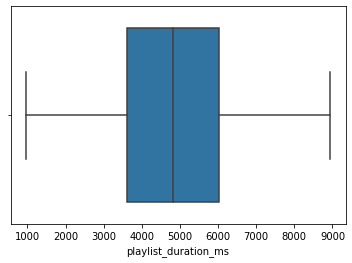

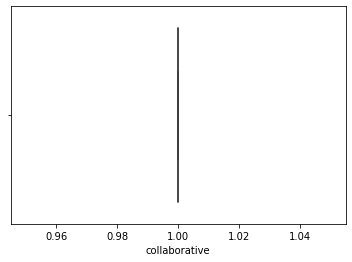

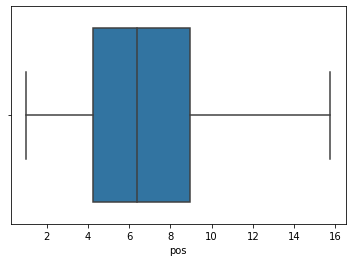

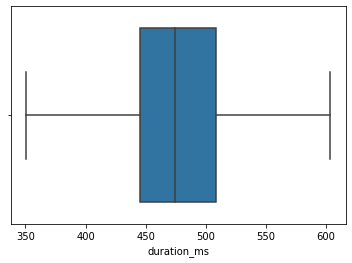

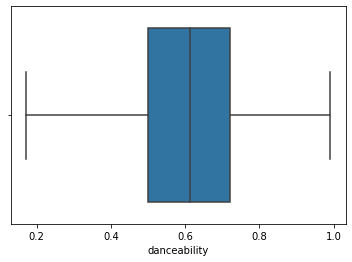

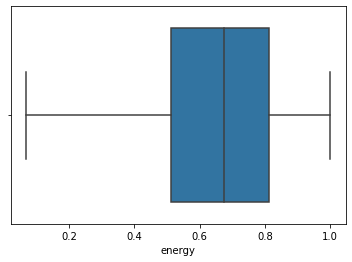

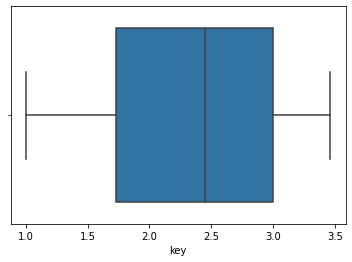

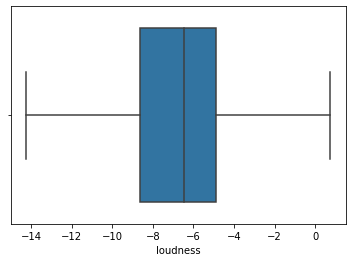

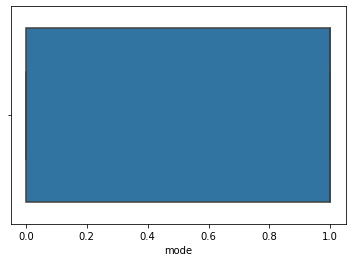

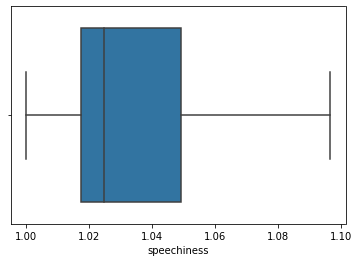

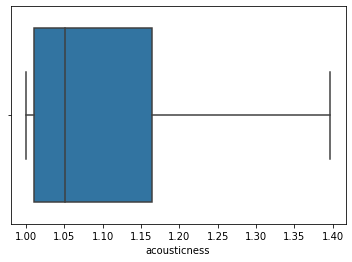

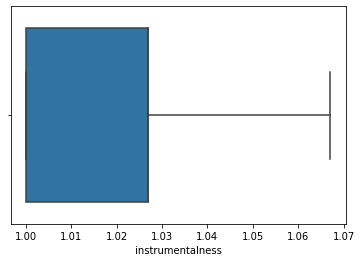

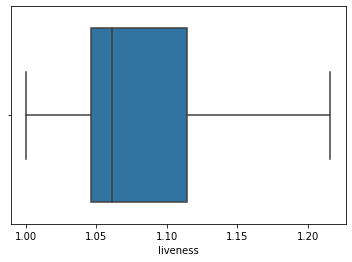

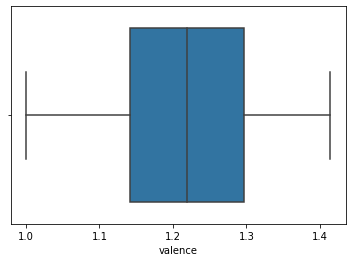

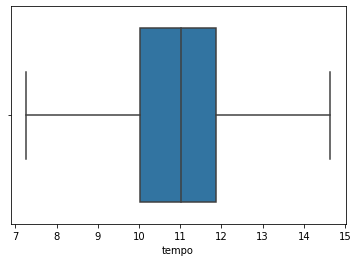

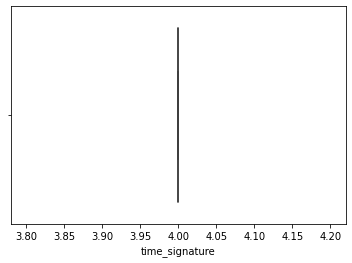

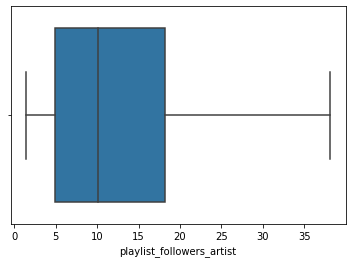

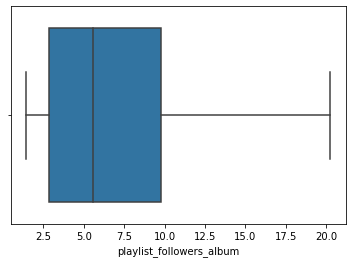

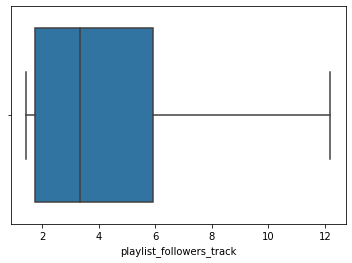

In [151]:
for col in numerical_columns:
    sns.boxplot(df_cleaned[col])
    plt.show()

## Feature Scaling

In [152]:
scaler = MinMaxScaler()

# transform data
df_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned[numerical_columns]), columns = df_cleaned[numerical_columns].columns)
df_scaled

,pid,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,collaborative,pos,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,playlist_followers_artist,playlist_followers_album,playlist_followers_track
0,0.00,0.85,0.35,0.38,0.36,0.0,0.09,0.31,0.0,0.00,0.50,0.89,0.80,0.50,0.48,0.0,0.61,3.89e-02,0.05,0.11,0.83,0.54,0.0,0.27,0.18,0.30
1,0.16,0.92,0.94,0.98,0.99,0.0,0.35,0.81,0.0,0.52,0.50,0.89,0.80,0.50,0.48,0.0,0.61,3.89e-02,0.05,0.11,0.83,0.54,0.0,0.27,0.18,0.30
2,0.22,0.95,0.56,0.59,0.56,0.0,0.05,0.46,0.0,0.19,0.50,0.89,0.80,0.50,0.48,0.0,0.61,3.89e-02,0.05,0.11,0.83,0.54,0.0,0.27,0.18,0.30
3,0.28,0.66,0.72,0.71,0.79,0.0,0.23,0.70,0.0,0.38,0.50,0.89,0.80,0.50,0.48,0.0,0.61,3.89e-02,0.05,0.11,0.83,0.54,0.0,0.27,0.18,0.30
4,0.30,0.96,0.15,0.16,0.11,0.4,0.07,0.12,0.0,0.03,0.50,0.89,0.80,0.50,0.48,0.0,0.61,3.89e-02,0.05,0.11,0.83,0.54,0.0,0.27,0.18,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266358,1.00,0.15,0.19,0.43,0.56,0.0,0.15,0.47,0.0,0.30,0.53,0.58,0.60,0.74,0.47,1.0,0.12,6.02e-02,0.40,0.27,0.73,0.27,0.0,0.39,0.40,0.00
266359,1.00,0.15,0.19,0.43,0.56,0.0,0.15,0.47,0.0,0.34,0.74,0.35,0.73,0.88,0.54,1.0,0.16,5.64e-03,0.08,0.28,0.67,0.80,0.0,0.21,0.00,0.00
266360,1.00,0.15,0.19,0.43,0.56,0.0,0.15,0.47,0.0,0.35,0.64,0.66,0.66,1.00,0.37,1.0,0.27,6.52e-02,0.65,0.14,0.80,0.33,0.0,0.21,0.00,0.00
266361,1.00,0.15,0.19,0.43,0.56,0.0,0.15,0.47,0.0,0.36,0.58,0.68,0.67,0.88,0.46,1.0,0.19,1.84e-01,1.00,0.18,0.64,0.34,0.0,0.21,1.00,0.20


## Create New Features by Features Interaction

**I conducted sentiment analysis finding the polarity and subjectivity of the track name.**

- Subjectivity (0,1): The amount of personal opinion and factual information contained in the text.
- Polarity (-1,1): The degree of strong or clearly defined sentiment accounting for negation.
    
"The goal of the sentiment analysis is to extract additional features from the tracks.
By doing so, we can extract sentiment data other audio features via textual information.
For example, if the general mood of the song titles of a playlist is positive,
then this can be utilized to recommend positive songs. However, due to the short length of the titles,
the two metrics cannot produce optimal results."

In [153]:
df_new = df_scaled.copy()
happy = pd.Series(data = df_new['valence'], index = df_new['valence'].index, name='happy')
happy[happy>0.5] = 1
happy[happy<0.5] = 0
happy

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
266358    1.0
266359    1.0
266360    1.0
266361    1.0
266362    0.0
Name: happy, Length: 266363, dtype: float64

In [154]:
speech = pd.Series(data = df_new['speechiness'], index = df_new['speechiness'].index, name='speech')

speech[(speech>=0.66)] = 1
speech[(speech<0.66)] = 0
speech

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
266358    0.0
266359    0.0
266360    0.0
266361    0.0
266362    0.0
Name: speech, Length: 266363, dtype: float64

In [155]:
df_new = pd.concat([df_new, happy, speech], axis=1)
df_new

,pid,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,collaborative,pos,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,playlist_followers_artist,playlist_followers_album,playlist_followers_track,happy,speech
0,0.00,0.85,0.35,0.38,0.36,0.0,0.09,0.31,0.0,0.00,0.50,0.89,0.80,0.50,0.48,0.0,0.0,3.89e-02,0.05,0.11,1.0,0.54,0.0,0.27,0.18,0.30,1.0,0.0
1,0.16,0.92,0.94,0.98,0.99,0.0,0.35,0.81,0.0,0.52,0.50,0.89,0.80,0.50,0.48,0.0,0.0,3.89e-02,0.05,0.11,1.0,0.54,0.0,0.27,0.18,0.30,1.0,0.0
2,0.22,0.95,0.56,0.59,0.56,0.0,0.05,0.46,0.0,0.19,0.50,0.89,0.80,0.50,0.48,0.0,0.0,3.89e-02,0.05,0.11,1.0,0.54,0.0,0.27,0.18,0.30,1.0,0.0
3,0.28,0.66,0.72,0.71,0.79,0.0,0.23,0.70,0.0,0.38,0.50,0.89,0.80,0.50,0.48,0.0,0.0,3.89e-02,0.05,0.11,1.0,0.54,0.0,0.27,0.18,0.30,1.0,0.0
4,0.30,0.96,0.15,0.16,0.11,0.4,0.07,0.12,0.0,0.03,0.50,0.89,0.80,0.50,0.48,0.0,0.0,3.89e-02,0.05,0.11,1.0,0.54,0.0,0.27,0.18,0.30,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266358,1.00,0.15,0.19,0.43,0.56,0.0,0.15,0.47,0.0,0.30,0.53,0.58,0.60,0.74,0.47,1.0,0.0,6.02e-02,0.40,0.27,1.0,0.27,0.0,0.39,0.40,0.00,1.0,0.0
266359,1.00,0.15,0.19,0.43,0.56,0.0,0.15,0.47,0.0,0.34,0.74,0.35,0.73,0.88,0.54,1.0,0.0,5.64e-03,0.08,0.28,1.0,0.80,0.0,0.21,0.00,0.00,1.0,0.0
266360,1.00,0.15,0.19,0.43,0.56,0.0,0.15,0.47,0.0,0.35,0.64,0.66,0.66,1.00,0.37,1.0,0.0,6.52e-02,0.65,0.14,1.0,0.33,0.0,0.21,0.00,0.00,1.0,0.0
266361,1.00,0.15,0.19,0.43,0.56,0.0,0.15,0.47,0.0,0.36,0.58,0.68,0.67,0.88,0.46,1.0,0.0,1.84e-01,1.00,0.18,1.0,0.34,0.0,0.21,1.00,0.20,1.0,0.0


## Drop Useless Features

In [156]:
df_new.nunique()

pid                           4000
modified_at                    980
num_artists                    163
num_albums                     200
num_tracks                     241
num_followers                    4
num_edits                      119
playlist_duration_ms          4000
collaborative                    1
pos                            248
duration_ms                  36476
danceability                   817
energy                        1175
key                             12
loudness                     12448
mode                             2
speechiness                      2
acousticness                  4556
instrumentalness              4517
liveness                      1200
valence                          2
tempo                        49286
time_signature                   1
playlist_followers_artist      367
playlist_followers_album       243
playlist_followers_track       136
happy                            2
speech                           2
dtype: int64

In [157]:
df_new = df_new.drop(['collaborative', 'time_signature', 'pid', 'modified_at', 'pos'], axis=1)
df_new

,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playlist_followers_artist,playlist_followers_album,playlist_followers_track,happy,speech
0,0.35,0.38,0.36,0.0,0.09,0.31,0.50,0.89,0.80,0.50,0.48,0.0,0.0,3.89e-02,0.05,0.11,1.0,0.54,0.27,0.18,0.30,1.0,0.0
1,0.94,0.98,0.99,0.0,0.35,0.81,0.50,0.89,0.80,0.50,0.48,0.0,0.0,3.89e-02,0.05,0.11,1.0,0.54,0.27,0.18,0.30,1.0,0.0
2,0.56,0.59,0.56,0.0,0.05,0.46,0.50,0.89,0.80,0.50,0.48,0.0,0.0,3.89e-02,0.05,0.11,1.0,0.54,0.27,0.18,0.30,1.0,0.0
3,0.72,0.71,0.79,0.0,0.23,0.70,0.50,0.89,0.80,0.50,0.48,0.0,0.0,3.89e-02,0.05,0.11,1.0,0.54,0.27,0.18,0.30,1.0,0.0
4,0.15,0.16,0.11,0.4,0.07,0.12,0.50,0.89,0.80,0.50,0.48,0.0,0.0,3.89e-02,0.05,0.11,1.0,0.54,0.27,0.18,0.30,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266358,0.19,0.43,0.56,0.0,0.15,0.47,0.53,0.58,0.60,0.74,0.47,1.0,0.0,6.02e-02,0.40,0.27,1.0,0.27,0.39,0.40,0.00,1.0,0.0
266359,0.19,0.43,0.56,0.0,0.15,0.47,0.74,0.35,0.73,0.88,0.54,1.0,0.0,5.64e-03,0.08,0.28,1.0,0.80,0.21,0.00,0.00,1.0,0.0
266360,0.19,0.43,0.56,0.0,0.15,0.47,0.64,0.66,0.66,1.00,0.37,1.0,0.0,6.52e-02,0.65,0.14,1.0,0.33,0.21,0.00,0.00,1.0,0.0
266361,0.19,0.43,0.56,0.0,0.15,0.47,0.58,0.68,0.67,0.88,0.46,1.0,0.0,1.84e-01,1.00,0.18,1.0,0.34,0.21,1.00,0.20,1.0,0.0


<AxesSubplot:>

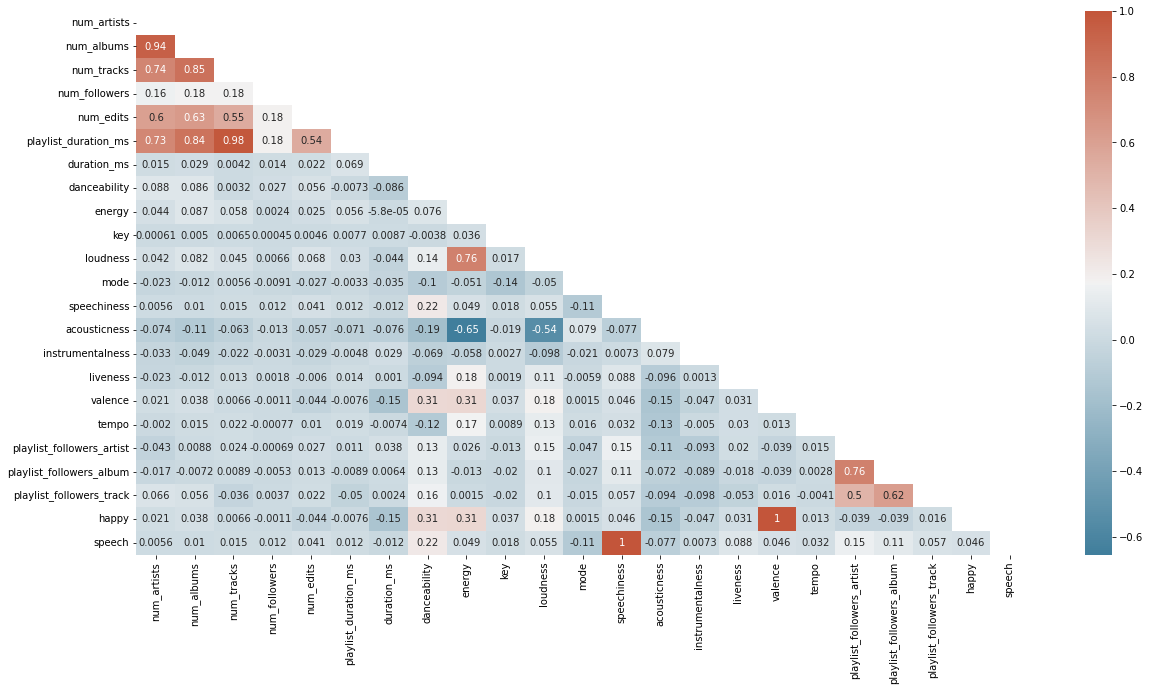

In [158]:
corr = df_new.corr()

# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(20, 10))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

## Use PCA for Dimensionality Reduction

In [159]:
df_new.shape

(266363, 23)

The cumulative variance of the first two principal components is 0.50677


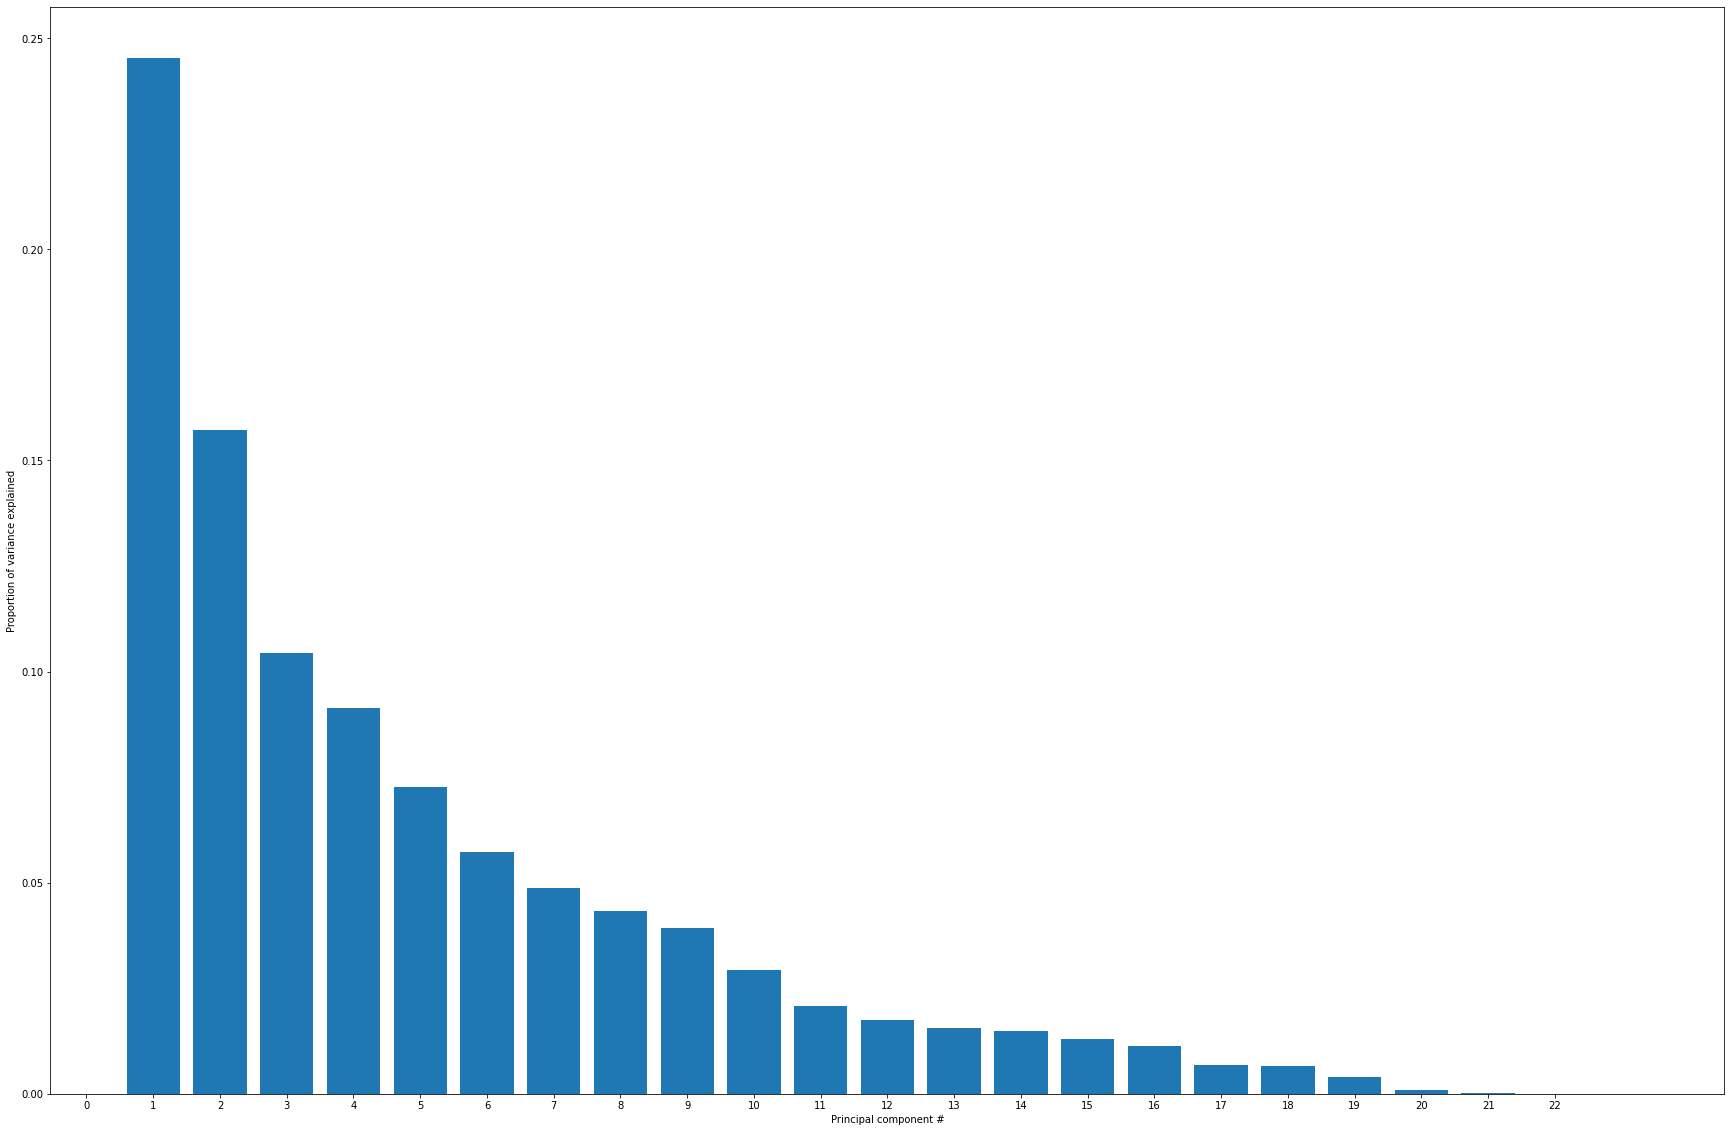

In [160]:
# Perform PCA to make dimensionality reduction 
pca = PCA()

# Fit the standardized data to the pca
pca=pca.fit(df_new)

# Plot the proportion of variance explained on the y-axis of the bar plot
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(30, 20))
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('Principal component #')
plt.ylabel('Proportion of variance explained')
plt.xticks(range(df_new.shape[1]))

# Compute the cumulative proportion of variance explained by the first two principal components
two_first_comp_var_exp = pca.explained_variance_ratio_.cumsum()[2]
print("The cumulative variance of the first two principal components is {}".format(
    round(two_first_comp_var_exp, 5)))

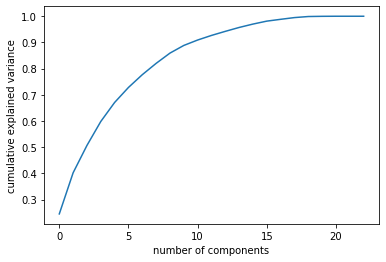

In [161]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [162]:
pca = PCA(n_components=10)
pca.fit(df_new)
df_pca = pca.transform(df_new)
print("original shape:   ", df_new.shape)
print("transformed shape:", df_pca.shape)

original shape:    (266363, 23)
transformed shape: (266363, 10)
